In [10]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [7]:
true_mean = 3
n = 100
y = pd.Series(norm(true_mean).rvs(size=n))
y

0     1.390117
1     5.009077
2     3.739573
3     3.818683
4     3.387752
        ...   
95    1.273962
96    4.319150
97    2.017645
98    2.284258
99    2.515449
Length: 100, dtype: float64

<Axes: ylabel='Density'>

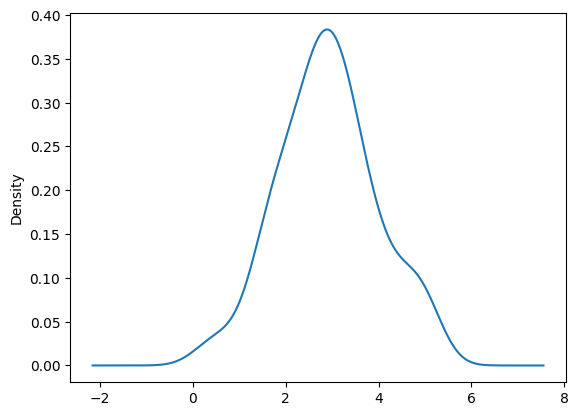

In [8]:
y.plot.kde()

In [9]:
# y ~ N(\theta, 1^2)
# \theta ~ N(0, 3^2)
def prior(theta):
    return norm(loc=0, scale=3).pdf(theta)

def likelihood(theta):
    return norm(loc=theta, scale=1).pdf(y).sum()

<Axes: title={'center': 'Prior'}>

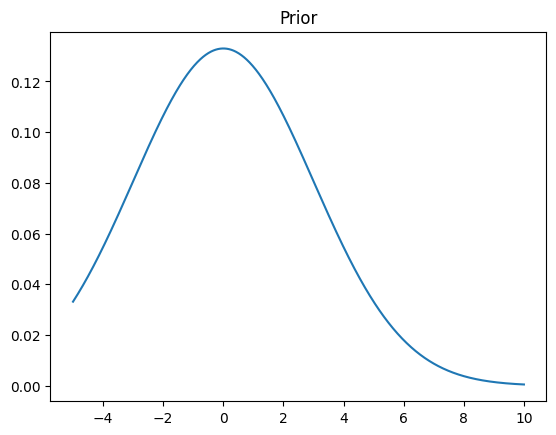

In [19]:
x = np.linspace(-5, 10, 1000)
prior_curve = pd.Series(prior(x), index=x)
prior_curve.plot(title="Prior")

<Axes: title={'center': 'Likelihood'}>

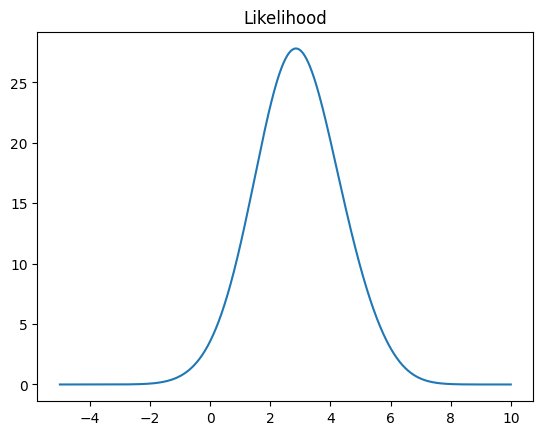

In [20]:
likelihood_curve = pd.Series([likelihood(x_i) for x_i in x], index=x)
likelihood_curve.plot(title="Likelihood")

<Axes: title={'center': 'Unnormalized posterior'}>

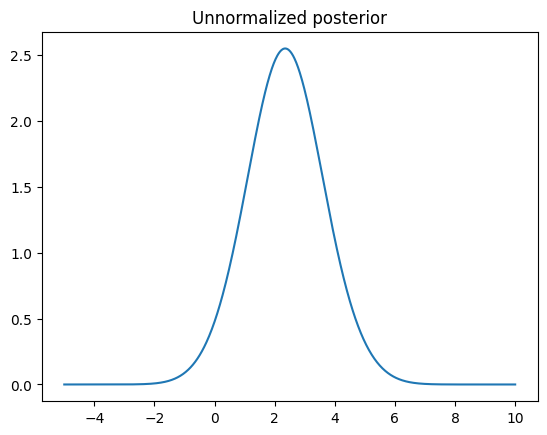

In [22]:
unnormalized_posterior_curve = prior_curve*likelihood_curve
unnormalized_posterior_curve.plot(title="Unnormalized posterior")

<Axes: title={'center': 'Unnormalized posterior'}, ylabel='Frequency'>

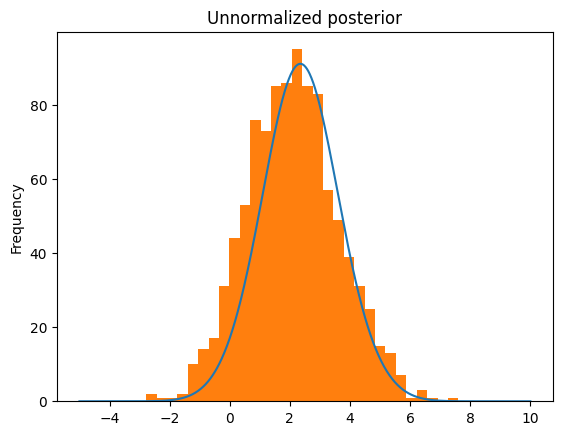

In [43]:
n_draws = 1000
c = n_draws / 28
unnormalized_posterior_curve.mul(c).plot(title="Unnormalized posterior")
pd.Series(norm(loc=2.2, scale=1.5).rvs(n_draws)).plot.hist(bins=30)

<Axes: >

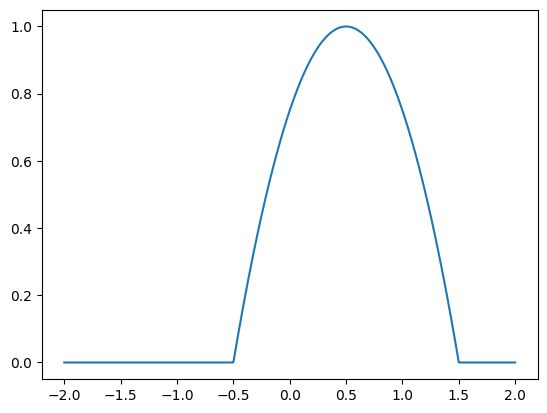

In [46]:
def f(x):
    return (1-(x-0.5)**2)*(x >= -0.5)*(x <= 1.5)

x = np.linspace(-2, 2, 1000)
pd.Series(f(x), index=x).plot()